In [5]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, matthews_corrcoef
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
sys.path.append('./data/')
sys.path.append('./models/')
from thmodel import *
import pickle
with open('./data/dict_data_final.pkl', 'rb') as f:
    data = pickle.load(f)

x, y = data['VallGallinera']

In [6]:
from baseline import *

In [7]:
P = [0, 0.1, 0.5, 0.9, 1.01]
C = 1.25

In [8]:
grid = Grid(x=x, y=y)
grid.initialize(part=P, div=C)
grid.submatrix()
grid.enlargement_process()
grid.montecarlo(n_it=100)

<AxesSubplot:>

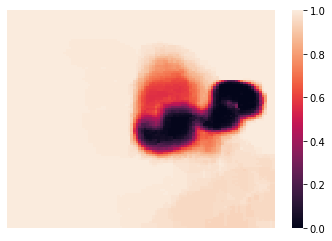

In [16]:
sns.heatmap(grid.X0[75:175, 75:175, -1], xticklabels=False, yticklabels=False)

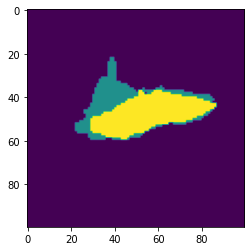

In [17]:
plt.imshow(y[75:175, 75:175, -1])
plt.show()

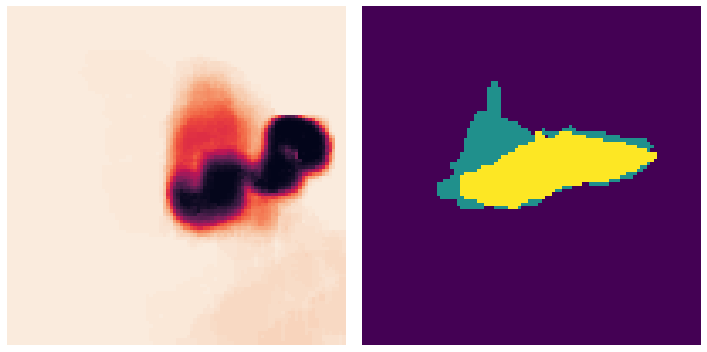

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Primera imagen - Heatmap
sns.heatmap(grid.X0[75:175, 75:175, -1], xticklabels=False, yticklabels=False, ax=axes[0], cbar=False)

# Segunda imagen - Imagen
axes[1].imshow(y[75:175, 75:175, -1])
axes[1].axis('off')

# Ajustar la escala
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.savefig('outcomeVallGallinera.png', dpi = 600)
# Mostrar la figura
plt.show()


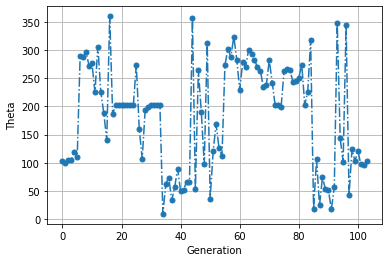

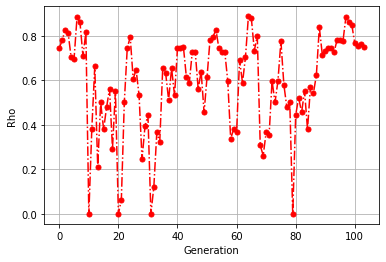

In [19]:
plt.plot(x.Theta.values*180/np.pi, '-.o', markersize=5)
plt.grid()
plt.xlabel('Generation')
plt.ylabel('Theta')
plt.savefig('theta.png', dpi=300)
plt.show()
plt.plot(x.Rho.values, 'r-.o', markersize=5)
plt.grid()
plt.xlabel('Generation')
plt.ylabel('Rho')
plt.savefig('rho.png', dpi=300)
plt.show()